# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering model on the data set using 8 clusters and compute the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for the model.

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [5]:
km8 = KMeans(n_clusters=8)
km8.fit(df)

KMeans()

In [6]:
y_pred8 = km8.predict(df)
y_pred8

array([7, 7, 7, 7, 0, 7, 7, 0, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 7, 7, 7, 0,
       7, 0, 0, 0, 7, 7, 0, 7, 0, 7, 0, 0, 0, 0, 0, 0, 3, 7, 7, 7, 7, 0,
       7, 0, 7, 7, 7, 7, 7, 7, 7, 0, 7, 7, 7, 0, 7, 3, 4, 4, 3, 3, 2, 2,
       3, 3, 4, 6, 4, 0, 2, 0, 3, 3, 3, 4, 6, 2, 3, 3, 2, 1, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2,
       3, 3, 2, 2, 2, 2, 3, 2, 4, 3, 2, 0, 2, 3, 3, 3, 2, 2, 2, 2, 4, 4,
       4, 4, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 4, 1, 1, 5, 5, 5, 5, 5, 5,
       4, 1, 5, 1, 5, 5, 1, 1, 1, 4, 5, 1, 5, 5, 5, 5, 4, 4, 5, 1, 5, 5,
       5, 5], dtype=int32)

In [7]:
silhouette_score(df, y_pred8, metric = 'euclidean')

0.1468833069110415

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [8]:
km5 = KMeans(n_clusters=5)
km5.fit(df)

KMeans(n_clusters=5)

In [9]:
y_pred5 = km5.predict(df)
y_pred5

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 2, 3,
       2, 2, 2, 4, 2, 3, 2, 3, 3, 2, 2, 2, 4, 3, 2, 2, 2, 0, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 4, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [10]:
silhouette_score(df, y_pred5, metric = 'euclidean')

0.25809045568490757

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [11]:
km3 = KMeans(n_clusters=3)
km3.fit(df)

KMeans(n_clusters=3)

In [12]:
y_pred3 = km3.predict(df)
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [13]:
silhouette_score(df, y_pred3, metric = 'euclidean')

0.2848589191898987

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

In [14]:
# Arbitrarily selecting a range of values for K
K = range(1,10)

In [15]:
sum_of_squared_distances = []

In [16]:
# Using Scikit Learn’s KMeans Algorithm to find sum of squared distances
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    sum_of_squared_distances.append(model.inertia_)

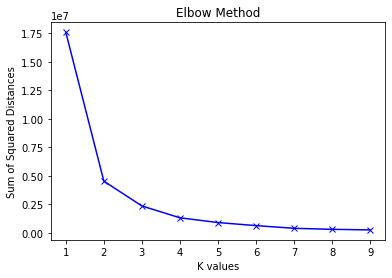

In [17]:
plt.plot(K, sum_of_squared_distances, "bx-")
plt.xlabel("K values")
plt.ylabel("Sum of Squared Distances")
plt.title("Elbow Method")
plt.show()

k = 3 , es donde la recta recta empieza a estabilizarse.
Y efectivamente cuando hemos sacado anteriormente las distintas métricas la que mejor nos daba es la de KMeans(n_clusters=3) (que es la mayor de las 3 que habíamos calculado).


## 5. Try performing the same elbow tests with an [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) model and compare the results you get to the KMeans results.

In [42]:
from sklearn.cluster import

In [45]:
clustering = AgglomerativeClustering(n_clusters=3).fit(X)
clustering.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

In [46]:
from yellowbrick.cluster import KElbowVisualizer

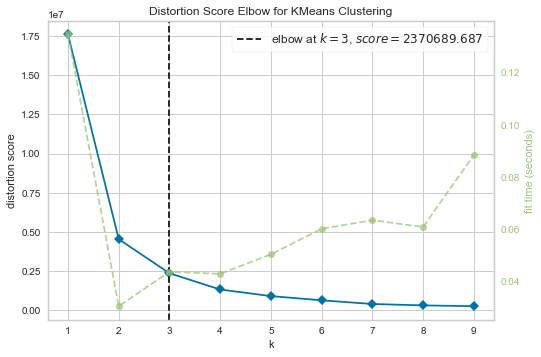

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
model2 = KMeans()
visualizer = KElbowVisualizer(model2, k=(1,10))

visualizer.fit(X)       
visualizer.show() 

## 6. Create and plot a scatter matrix (pairplot) showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [51]:
X["clusters"] = clustering.labels_

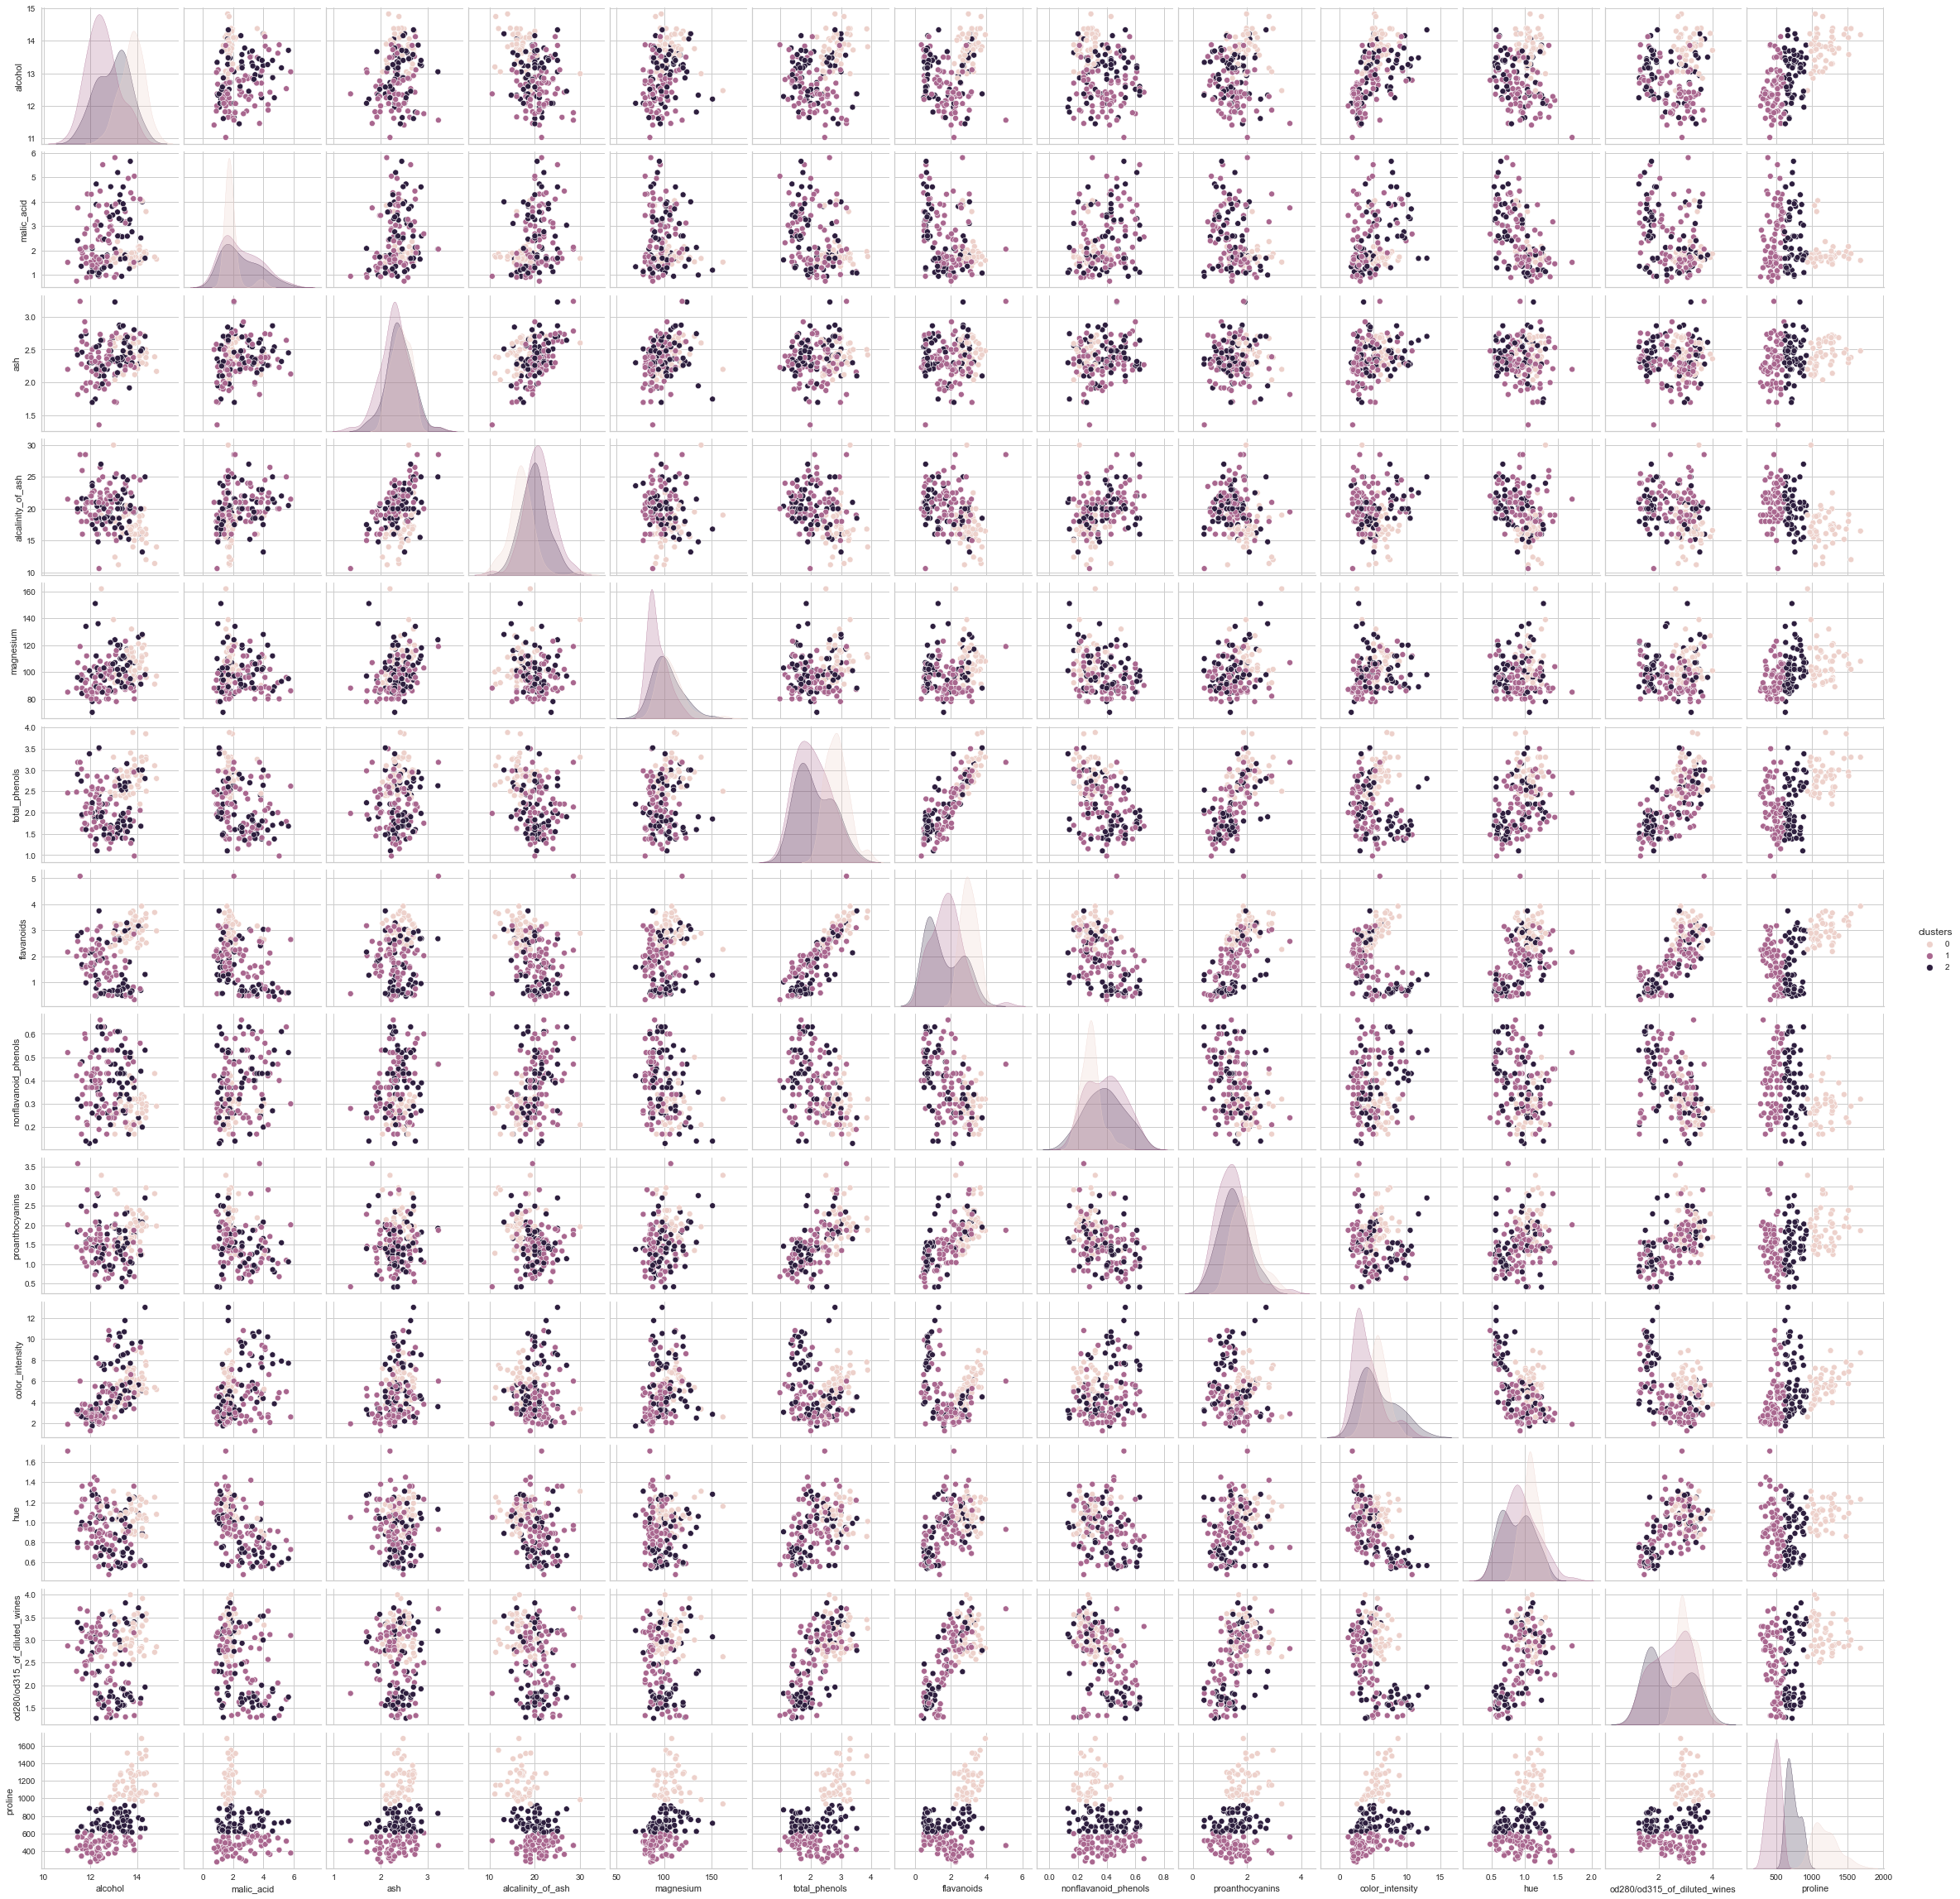

In [50]:
sns.pairplot(X, hue="clusters")

## 7. Apply a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) transform and plot the first two principle components with the plot point colors determined by cluster.

In [31]:
from sklearn.decomposition import PCA

In [84]:
pca = PCA( n_components=2)
wine = pd.DataFrame(pca.fit_transform(X), columns=["PC1","PC2"])
wine["clusters"] = clustering.labels_
wine.head(5)

,PC1,PC2,clusters
0,318.564058,21.486392,0
1,303.098512,-5.369838,0
2,438.062117,-6.540998,0
3,733.240888,0.191741,0
4,-11.572611,18.496606,2


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

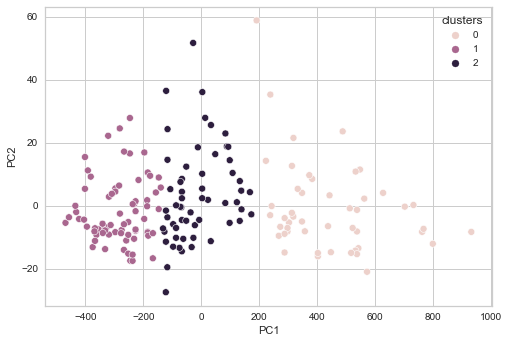

In [73]:
sns.scatterplot(wine["PC1"],wine["PC2"], hue=wine["clusters"])

## 8. Generate a series of [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) plots showing the clusters at a variety of perplexities.

In [75]:
from sklearn.manifold import TSNE

In [79]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, learning_rate=200)

In [83]:
wine2 = pd.DataFrame(tsne.fit_transform(X), columns=["TSNE1","TSNE2"])
wine2["clusters"] = clustering.labels_
wine2.head(5)

,TSNE1,TSNE2,clusters
0,4.944523,9.724975,0
1,5.435880,9.036116,0
2,6.427234,11.468615,0
3,7.721543,14.065040,0
4,0.603922,2.013795,2


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TSNE1', ylabel='TSNE2'>

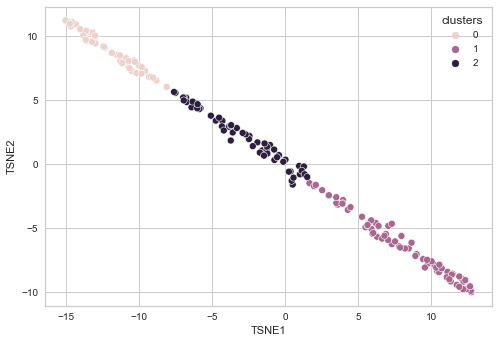

In [81]:
sns.scatterplot(wine2["TSNE1"],wine2["TSNE2"], hue=wine2["clusters"])